## APRISA IDMA MUTIARA
## 2209106001
## KECERDASAN BUATAN A1 22

DATASET:
https://www.kaggle.com/datasets/vencerlanz09/sea-animals-image-dataste/


Mendownloand dataset dari kaggle langsung

In [1]:
!pip install -q Kaggle

In [2]:
from google.colab import files
uploaded=files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d vencerlanz09/sea-animals-image-dataste

100% 312M/312M [00:02<00:00, 124MB/s]
100% 312M/312M [00:02<00:00, 124MB/s]


Melakukan unzip terhadap file sea-animals-image-dataste.zip

In [5]:
!unzip 'sea-animals-image-dataste.zip'

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: Seahorse/9891995103_849905035f_o.jpg  
  inflating: Seahorse/9984393_fb8ac77d6a_o.jpg  
  inflating: Seahorse/Sea Horse (1).jpg  
  inflating: Seahorse/Sea Horse (10).jpg  
  inflating: Seahorse/Sea Horse (11).jpg  
  inflating: Seahorse/Sea Horse (12).jpg  
  inflating: Seahorse/Sea Horse (13).jpg  
  inflating: Seahorse/Sea Horse (14).jpg  
  inflating: Seahorse/Sea Horse (15).jpg  
  inflating: Seahorse/Sea Horse (16).jpg  
  inflating: Seahorse/Sea Horse (17).jpg  
  inflating: Seahorse/Sea Horse (18).jpg  
  inflating: Seahorse/Sea Horse (19).jpg  
  inflating: Seahorse/Sea Horse (2).jpg  
  inflating: Seahorse/Sea Horse (20).jpg  
  inflating: Seahorse/Sea Horse (21).jpg  
  inflating: Seahorse/Sea Horse (22).jpg  
  inflating: Seahorse/Sea Horse (23).jpg  
  inflating: Seahorse/Sea Horse (24).jpg  
  inflating: Seahorse/Sea Horse (25).jpg  
  inflating: Seahorse/Sea Horse (26).jpg  
  inflating: Seahorse/Sea

### Data Preparation

Download dan import library.

In [10]:
!pip install split-folders

In [11]:
import splitfolders

Membagi data menjadi test, train dan validasi dengan ratio 80%, 10%, 10% di dalam file baru yaitu sea-animals.

In [12]:
splitfolders.ratio ("sea-animals-image-dataste",
                    output="sea-animals",
                    # mirip random state
                    seed=1337,
                    ratio=(.8, .1, .1))

Copying files: 13711 files [00:05, 2460.48 files/s]


Import library ImageDataGenerator.

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Melakukan image augmentation dengan membuat variabel train_datagen dan valtest_datagen.

In [16]:
train_datagen = ImageDataGenerator(
                rescale=1/255,
                horizontal_flip=True,
                width_shift_range=0.2,
                height_shift_range=0.2,
                brightness_range = (0.3, 0.9),
                zoom_range=0.2)

valtest_datagen = ImageDataGenerator(
                rescale=1/255)

Gunakan variabel di atas ke dalam train_generator, val_generator dan test_generator. Dengan target_size nya 224 x 224 dan batch_size 32 dengan kelas categorical.

In [17]:
train_generator = train_datagen.flow_from_directory(
    # copy path folder
    '/content/sea-animals/train',
    # terserah aja tapi biasanya 150 x 150
    target_size=(224, 224),
    # bakal update bobotnya setiap batch_size (32) gambar
    batch_size=32,
    # sesuaikan dengan klasifikasi
    class_mode='categorical'
)

val_generator = valtest_datagen.flow_from_directory(
    '/content/sea-animals/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = valtest_datagen.flow_from_directory(
    '/content/sea-animals/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 10961 images belonging to 23 classes.
Found 1361 images belonging to 23 classes.
Found 1389 images belonging to 23 classes.


Import library

In [18]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Menggunakan model sequential dengan 12 layer dan pada input_shape nya sebanyak (224, 224, 3).

In [19]:
model = Sequential([
    #Feature extraction layer
    Conv2D(64, (5, 5), activation='relu', padding='valid', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    Conv2D(128, (5, 5), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Fully-connected layer
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(23, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 106, 128)     204928    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 51, 51, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 25, 25, 256)       0

Menggunakan callbacks

In [20]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights = True)

Melakukan model compile dengan loss categorical_crossentropy karena pada class mode dibagian sebelumnya menggunakan categorical.

In [21]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

Membuat variabel fitmodel yang berisi model fit dengan melakukan iterasi sebanyak 15 kali dan beberapa fungsi lain yang berada di bawah ini.

In [22]:
fitmodel = model.fit(train_generator,
            validation_data = val_generator,
            epochs=15,
            verbose = 1,
            callbacks=[callback])

Epoch 1/15
343/343 [==============================] - 184s 494ms/step - loss: 2.7695 - accuracy: 0.1961 - val_loss: 2.5873 - val_accuracy: 0.2212
Epoch 2/15
343/343 [==============================] - 167s 487ms/step - loss: 2.5620 - accuracy: 0.2369 - val_loss: 2.5138 - val_accuracy: 0.2594
Epoch 3/15
343/343 [==============================] - 164s 478ms/step - loss: 2.4812 - accuracy: 0.2574 - val_loss: 2.5855 - val_accuracy: 0.2454
Epoch 4/15
343/343 [==============================] - 164s 477ms/step - loss: 2.4157 - accuracy: 0.2691 - val_loss: 2.3864 - val_accuracy: 0.2785
Epoch 5/15
343/343 [==============================] - 170s 495ms/step - loss: 2.3236 - accuracy: 0.2912 - val_loss: 2.2825 - val_accuracy: 0.3108
Epoch 6/15
343/343 [==============================] - 164s 478ms/step - loss: 2.2550 - accuracy: 0.3087 - val_loss: 2.1838 - val_accuracy: 0.3226
Epoch 7/15
343/343 [==============================] - 163s 474ms/step - loss: 2.1945 - accuracy: 0.3276 - val_loss: 2.1613 -

Didapatkan akurasi akhir 0.39596831798553467.

In [32]:
loss, accuracy = model.evaluate(test_generator, steps=len(test_generator))

print("Loss:", loss)
print("Accuracy:", accuracy)

44/44 [==============================] - 3s 77ms/step - loss: 2.0111 - accuracy: 0.3960
Loss: 2.0110623836517334
Accuracy: 0.39596831798553467


Membuat dan menampilkan grafik dari training dan validasi akurasi dan juga training dan validasi los.

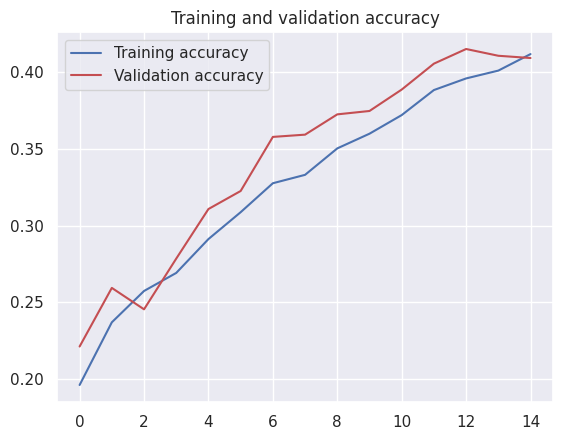

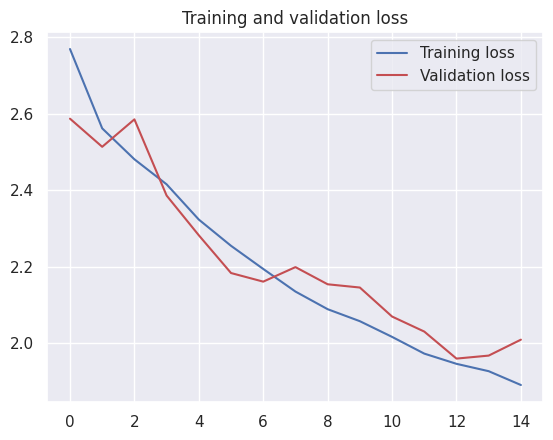

In [33]:
import matplotlib.pyplot as plt

accuracy = fitmodel.history['accuracy']
val_accuracy = fitmodel.history['val_accuracy']

loss = fitmodel.history['loss']
val_loss = fitmodel.history['val_loss']

epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')

plt.title('Training and validation loss')
plt.legend()
plt.show()